# Multivariate linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Reading and displaying csv files

In [2]:
salary_data = pd.read_csv('salary.csv')
salary_meta = pd.read_csv('Salary metadata.csv', sep=';')

display(salary_data.head())
display(salary_meta.head())

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


,Variable,Type,Explanation
0,salary,Continuous,Annual salary in dollars
1,exprior,Continuous,Years of experience prior to working in this f...
2,yearsworked,Continuous,Years worked in this field
3,yearsrank,Continuous,Years worked at current rank
4,market,Continuous,Market value (1 = salary at market value for p...


#### Missing values

In [3]:
salary_data.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [4]:
# droping missing values

new_salary_data = salary_data.dropna()

In [5]:
# confirmation from missing values
new_salary_data.isnull().sum().sum()

0

## 1. Performing some exploratory data analys (EDA): by creating appropariate plots to visualise and investigate relatioships between dependent variables and the target/independent variable (salary)

#### -  A descriptive statistics table to further characterise and describe the population under investigation

In [6]:
new_salary_data.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


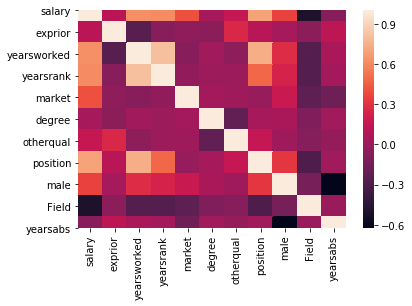

In [7]:
correlation_map = sns.heatmap(new_salary_data.corr())

In [8]:
predictors = new_salary_data[['salary','yearsworked','yearsrank','position','Field']].describe()
predictors

,salary,yearsworked,yearsrank,position,Field
count,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,12.836257,7.046784,2.130604,2.526316
std,12685.132358,9.447040,6.419708,0.819977,1.126644
min,29000.000000,0.000000,0.000000,1.000000,1.000000
25%,40000.000000,4.000000,2.000000,1.000000,2.000000
50%,50096.000000,12.000000,5.000000,2.000000,3.000000
75%,60345.000000,22.000000,12.000000,3.000000,4.000000
max,96156.000000,41.000000,28.000000,3.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275046F27C8>,
      dtype=object)

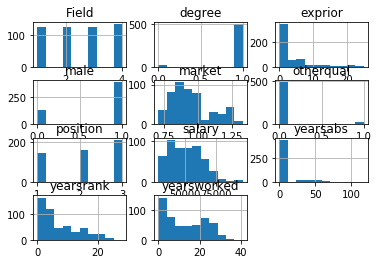

In [9]:
_ = new_salary_data.hist()